In [2]:
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmocean.cm as cmo
import dedalus.public as d3

import sys
sys.path.append("/scratch/ql2221/dedalus_sing/Library/Ryan_Plot_Codes")
from isospectrum import isospectrum

from scipy.stats import skew
plt.style.use('/scratch/ql2221/dedalus_sing/Library/Ryan_Plot_Codes/ryan_mplstyle.mplstyle')

In [3]:
Lx = 60
Ly = 30
Domain = Lx*Ly
Nx = 512
Ny = 256

dealias = 3/2
stop_sim_time = 5000
timestepper = d3.RK443
dtype = np.float64

#Physical Parameters
delx = Lx/Nx
nu2 = (delx)**2*4
T = 0.2
lambda_scale = Lx / 50 / (2 * np.pi)
Delu = 5
r = 0.16 * (Delu / lambda_scale)
beta = 0.05
k_d = 1


snapname = '/scratch/ql2221/dedalus_sing/Channel/2LayQG_channel_snap_U5/2LayQG_channel_snap_U5_s3.h5'
diagname = '/scratch/ql2221/dedalus_sing/Channel/2LayQG_channel_diag_U5/2LayQG_channel_diag_U5_s1.h5'

with h5py.File(diagname, mode='r') as file:
    a_group_key = list(file.keys())
    print(a_group_key)
    
    print(file['scales'])
    print(list(file['scales']))
    print(file['tasks'])
    print(list(file['tasks']))
    
    dg_time_ary = np.array(file['scales']['sim_time'])

    
    KE1 = np.array(file['tasks']['KE1'])
    KE2 = np.array(file['tasks']['KE2'])
    APE = np.array(file['tasks']['APE'])
    EKE1 = np.array(file['tasks']['EKE1'])
    EKE2 = np.array(file['tasks']['EKE2'])
    ZKE1 = np.array(file['tasks']['ZKE1'])
    ZKE2 = np.array(file['tasks']['ZKE2'])
    ZAPE = np.array(file['tasks']['ZAPE'])
    

['scales', 'tasks']
<HDF5 group "/scales" (6 members)>
['constant', 'iteration', 'sim_time', 'timestep', 'wall_time', 'write_number']
<HDF5 group "/tasks" (9 members)>
['APE', 'EAPE', 'EKE1', 'EKE2', 'KE1', 'KE2', 'ZAPE', 'ZKE1', 'ZKE2']


In [4]:
file = h5py.File(diagname, mode='r')

In [5]:
test = file["scales"]['sim_time'][:]

In [6]:
test

array([0.00000000e+00, 1.00001000e-01, 2.00001000e-01, ...,
       1.52537043e+04, 1.52538041e+04, 1.52539042e+04])

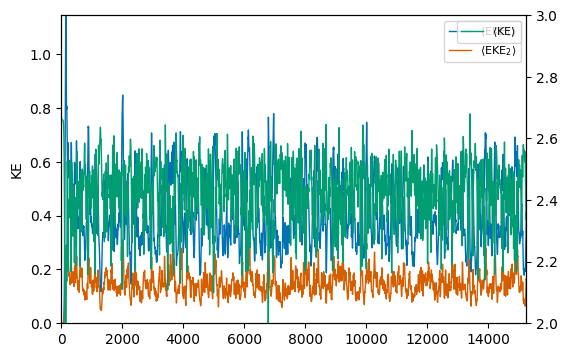

In [7]:
min_x = np.min([dg_time_ary.size,EKE1.size])
# EKE1 = EKE1 * Domain
# EKE2 = EKE2 * Domain

fig=plt.figure(figsize=(15/2.5, 10/2.5))
ax = fig.add_subplot(111)
ax.plot(dg_time_ary[:min_x],EKE1[:min_x,:,:].ravel(), label=r"$\langle{\mathrm{EKE}_1}\rangle$")
ax.plot(dg_time_ary[:min_x],EKE2[:min_x,:,:].ravel(), label=r"$\langle{\mathrm{EKE}_2}\rangle$")
# plt.plot(dg_time_ary[:min_x],PE1[:min_x,:,:].ravel())

# ax.set_ylim(0,50)
ax.set_ylabel("KE")
# ax.legend()
ax.legend(loc=0)

ax2 = ax.twinx()
ax2.plot(0,0); ax2.plot(0,0)
# ax2.plot(dg_time_ary[:min_x],(U1_mean[:min_x,:,:]-U2_mean[:min_x,:,:]).ravel())
ax2.plot(dg_time_ary[:min_x],(ZKE1[:min_x,:,:]+ZKE2[:min_x,:,:]+ZAPE[:min_x,:,:]).ravel(),label=r"$\langle{\mathrm{KE}}\rangle$")
ax2.set_ylim(2,3)
# ax2.set_ylabel("Mean shear")
ax2.legend()

# plt.xlim(100,500)

# plt.plot(dg_time_ary[:min_x-1],(KE1[:min_x-1,:,:]-KE1[1:min_x,:,:]).ravel()*-15+25)

figname = "bla"
plt.show()
# plt.savefig(figname, bbox_inches='tight')

In [8]:
T = int(dg_time_ary[-1])
if T % 2 != 0:
    T = T-1
EKE1_slice = EKE1[500:T,:,:].ravel()
EKE2_slice = EKE2[500:T,:,:].ravel()

from scipy import signal
from scipy.fft import fft, fftshift

window = signal.windows.hann(EKE1_slice.size)

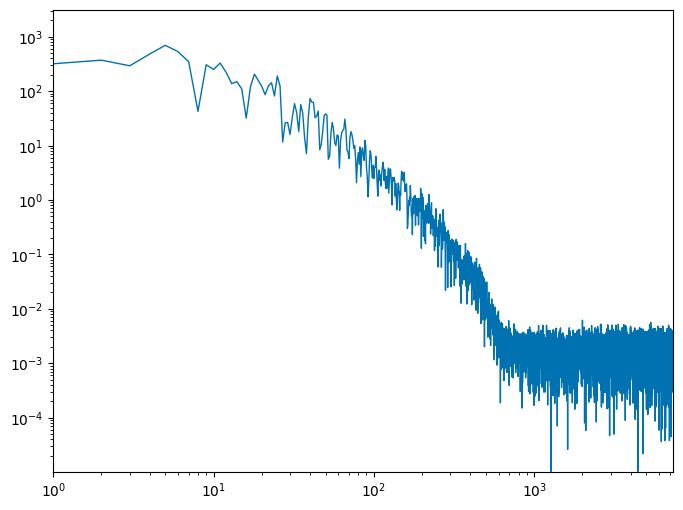

In [9]:
fig=plt.figure(figsize=(8, 6))
N = EKE1_slice.size

k_1 = fft(EKE1_slice * window)
k_1_mag = 1*np.abs(k_1[1:int(N/2)])+1*np.abs(k_1[-1:int(N/2):-1])


k_2 = fft(EKE2_slice * window)
k_2_mag = 1*np.abs(k_2[1:int(N/2)])+1*np.abs(k_2[-1:int(N/2):-1])

plt.loglog(np.arange(int(N/2)-1),k_1_mag ,label="$\mathrm{KE}_1$"); # plt.ylim(1e-5,1e2)

14752
72
5


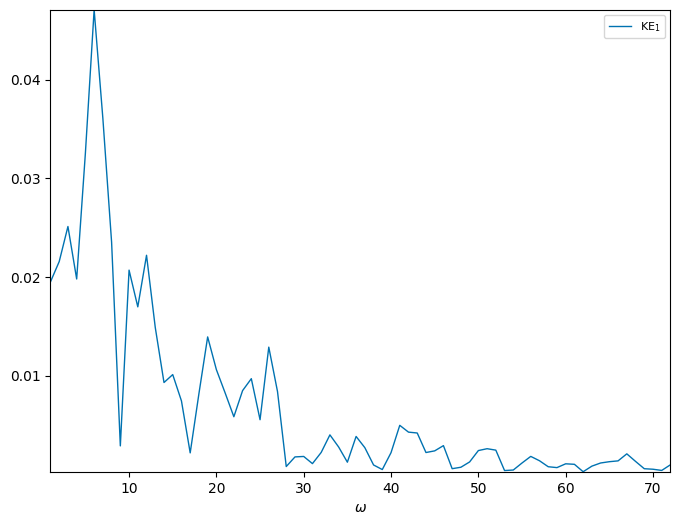

In [11]:
fig=plt.figure(figsize=(8, 6))

data = EKE1_slice

signal = (data-np.mean(data))*window
print(signal.size)
A = fft(signal)
n = len(A)
A /= n
AA = 1*np.abs(A[1:int(N/200)])+1*np.abs(A[-1:-int(N/200):-1])
print(AA.size)

# AA = AA[0:-3]+AA[1:-2]+AA[2:-1]

# plt.plot(data)
plt.plot(np.arange(AA.size)+1,(AA),label="$\mathrm{KE}_1$"); # plt.ylim(1e-5,1e2)

print(np.argmax(AA))

#########################
# data = SH_slice

# signal = (data-np.mean(data))*window
# A = fft(signal) / (len(window)/400)
# AA = 1*np.abs(A[1:2000])+1*np.abs(A[-1:2000:-1])
# # AA = AA[0:-3]+AA[1:-2]+AA[2:-1]

# AA = AA/np.max(AA)
# # plt.plot(data)
# plt.plot(np.arange(AA.size)+1,(AA),label="Mean Shear"); plt.xlim(1,100);# plt.ylim(1e-5,1e2)

# # k_ary = np.arange(signal.size)+1
# # plt.semilogy(k_ary,1/k_ary**6*1e14); plt.xlim(0,500);# plt.ylim(1e-5,1e2)

# print(np.argmax(AA))

plt.xlabel("$\omega$")
plt.legend()


# plt.savefig(figname, bbox_inches='tight')

In [14]:
A.size

8128

In [17]:
with h5py.File(snapname, mode='r') as file:
    a_group_key = list(file.keys())
    print(a_group_key)
    
    print(file['scales'])
    print(list(file['scales']))
    print(file['tasks'])
    print(list(file['tasks']))
    
    Psi_1_data = np.squeeze(np.array(file['tasks']['Psi_1']))
    Psi_2_data = np.squeeze(np.array(file['tasks']['Psi_2']))
    
    
    q1_data = np.squeeze(np.array(file['tasks']['q1']))
    q2_data = np.squeeze(np.array(file['tasks']['q2']))
    
    zeta_1_data = np.squeeze(np.array(file['tasks']['zeta_1']))
    zeta_2_data = np.squeeze(np.array(file['tasks']['zeta_2']))
    
    Psi_data = np.squeeze(np.array(file['tasks']['Psi']))
    
    sim_time_ary = np.array(file['scales']['sim_time'])
    print(sim_time_ary)
    
    x = np.array(file['scales'][list(file['scales'])[-2]])
    y = np.array(file['scales'][list(file['scales'])[-1]])

['scales', 'tasks']
<HDF5 group "/scales" (8 members)>
['constant', 'iteration', 'sim_time', 'timestep', 'wall_time', 'write_number', 'x_hash_726b6cff477fed92c3f98165e3a61f798557e581', 'y_hash_9ba114016e0b5713fe541c50a2cc326cfedb8299']
<HDF5 group "/tasks" (9 members)>
['HF1', 'HF2', 'Psi', 'Psi_1', 'Psi_2', 'q1', 'q2', 'zeta_1', 'zeta_2']
[200.00213025 201.00385778 202.00324677 203.00031982 204.00452993
 205.00019439 206.00464903 207.00249496 207.99645026 208.99639865
 210.00327253 211.0003428  211.99843739 213.00272517 214.00041504
 214.99930997 215.99979085 217.00128283 218.00288987 218.99582329
 220.00024403 220.99754302 222.00170588 222.99574182 223.99649772
 224.99572845 225.99621141 227.00146374 227.99838054 229.00002085
 229.99774627 231.00336664 232.00233912 233.00297773 234.00409896
 235.00272388 235.99902383 237.00122362 238.00079257 239.00062037
 240.00137517 241.00203222 242.00149577 242.99840278 244.00209841
 244.99954948 245.99732434 247.00035982 248.00064296 249.0050760

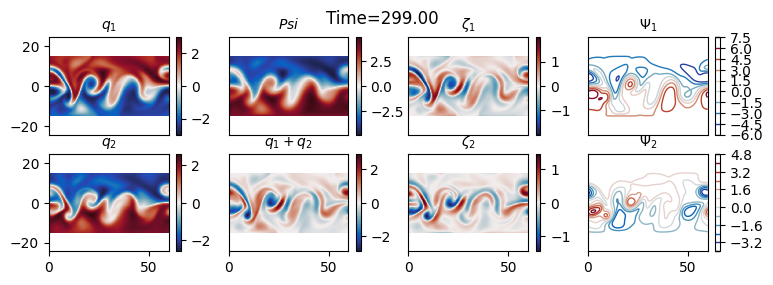

In [18]:
time_idx = -1
L = x[-1]+(x[-1]-x[-2])

# bg_meanQ1 = (xi**(-2)+8)*y*1
# bg_meanQ2 = (xi**(-2)-8)*y*0

# fig=plt.figure(figsize=(15/1.7, 3.6/1.7))
fig=plt.figure(figsize=(16/1.8, 5/1.8))
# fig=plt.figure(figsize=(11, 4))
fig.suptitle('Time=%.2f' %(sim_time_ary[time_idx]), y=0.98)
plt.subplot(2, 4, 1)
plt.pcolormesh(x,y,(q1_data[time_idx,:,:]).T, cmap=cmo.balance, norm=colors.CenteredNorm())
# plt.plot(x,np.sin(x*0.634*np.sqrt(8)-0.0)+L*0.8,'k')
# plt.plot(np.sin(y*0.5/xi)+L/2,y,'k')
# plt.axhline(5)
plt.xticks([]); 

plt.axis('equal')
cbar = plt.colorbar();
plt.title('$q_1$')

plt.subplot(2, 4, 3)
zmax = np.max(abs(zeta_1_data[time_idx,:,:]))/1
plt.pcolormesh(x,y,zeta_1_data[time_idx,:,:].T, cmap=cmo.balance, vmin=-zmax, vmax=zmax)
plt.axis('equal')
cbar = plt.colorbar();
plt.title('$\zeta_1$')
plt.xticks([]); plt.yticks([])

plt.subplot(2, 4, 2)
plt.pcolormesh(x,y,Psi_data[time_idx,:,:].T, cmap=cmo.balance, norm=colors.CenteredNorm())
plt.axis('equal')
cbar = plt.colorbar();
plt.title('$Psi$')
plt.xticks([]); plt.yticks([])

plt.subplot(2, 4, 4)
plt.contour(x,y,(Psi_1_data[time_idx,:,:]).T, 10, cmap=cmo.balance)
# plt.plot(x,np.sin(x*0.634*np.sqrt(8)-0.0)+L*0.8,'k')
plt.axis('equal')
cbar = plt.colorbar();
plt.title('$\Psi_1$')
plt.xticks([]); plt.yticks([])

plt.subplot(2, 4, 5)
plt.pcolormesh(x,y,(q2_data[time_idx,:,:]).T, cmap=cmo.balance, norm=colors.CenteredNorm())
plt.axis('equal')
cbar = plt.colorbar();
# plt.title('$q_1$+mean')
plt.title('$q_2$')

plt.subplot(2, 4, 7)
zmax = np.max(abs(zeta_2_data[time_idx,:,:]))/1
plt.pcolormesh(x,y,zeta_2_data[time_idx,:,:].T, cmap=cmo.balance, vmin=-zmax, vmax=zmax)
plt.axis('equal')
cbar = plt.colorbar();
# plt.contour(x,y,(div_2_data[time_idx,:,:]).T, [-0.003, 0.003], colors='black', norm=colors.CenteredNorm())
plt.title('$\zeta_2$')
plt.yticks([])

# plt.subplot(3, 4, 7)
# plt.pcolormesh(x,y,(div_2_data[time_idx,:,:]).T, cmap=cmo.balance, norm=colors.CenteredNorm())
# plt.axis('equal')
# cbar = plt.colorbar();
# plt.title('$\delta_2$')

plt.subplot(2, 4, 8)
plt.contour(x,y,(Psi_2_data[time_idx,:,:]).T, 10, cmap=cmo.balance)
# plt.plot(x,np.sin(x*0.634*np.sqrt(8)-0.0)+L*0.8,'k')
plt.axis('equal')
cbar = plt.colorbar();
plt.title('$\Psi_2$')
plt.yticks([])

plt.subplot(2, 4, 6)
plt.pcolormesh(x,y,(q1_data[time_idx,:,:]+q2_data[time_idx,:,:]).T, cmap=cmo.balance, norm=colors.CenteredNorm())
plt.axis('equal')
cbar = plt.colorbar();
plt.title('$q_1+q_2$')
plt.yticks([])

# plt.subplot(3, 4, 10)
# plt.pcolormesh(x,y,(h1_data[time_idx,:,:]+h2_data[time_idx,:,:]).T, cmap=cmo.balance, norm=colors.CenteredNorm())
# plt.axis('equal')
# cbar = plt.colorbar();
# plt.title('$\eta_0$')

# plt.subplot(3, 4, 11)
# plt.hist(q1_data[:,:,:].ravel(), log=True, density=True, bins=50, histtype='step',  label="top, %.2f" %skew(q1_data[:,:,:].ravel()))
# plt.hist(q2_data[:,:,:].ravel(), log=True, density=True, bins=50, histtype='step',  label="bot, %.2f" %skew(q2_data[:,:,:].ravel()))
# legend = plt.legend(title="Loc., Skewness", fontsize=7)

# plt.subplot(3, 4, 12)
# plt.hist(zeta_1_data[:,:,:].ravel(), log=True, density=True, bins=50, histtype='step',  label="top, %.2f" %skew(zeta_1_data[:,:,:].ravel()))
# plt.hist(zeta_2_data[:,:,:].ravel(), log=True, density=True, bins=50, histtype='step',  label="bot, %.2f" %skew(zeta_2_data[:,:,:].ravel()))
# legend = plt.legend(title="Loc., Skewness", fontsize=7)

figname = 'figs/2Lay_snap'
figname = figname.replace(".", "d" ); figname = figname+'.png'
# plt.savefig(figname, bbox_inches='tight', dpi=400)
plt.show()

-0.00040866352568329906


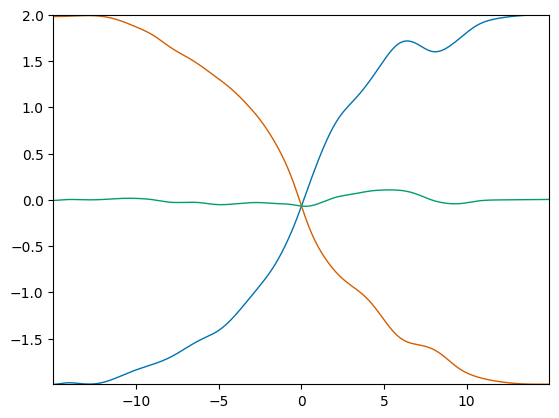

In [19]:
plt.plot(y,np.mean(q1_data[time_idx,:,:],0))
plt.plot(y,np.mean(q2_data[time_idx,:,:],0))
plt.plot(y,np.mean(q1_data[time_idx,:,:]+q2_data[time_idx,:,:],0)/2)

print(np.mean(q2_data[time_idx,:,:]))

# plt.xlim(14,19)

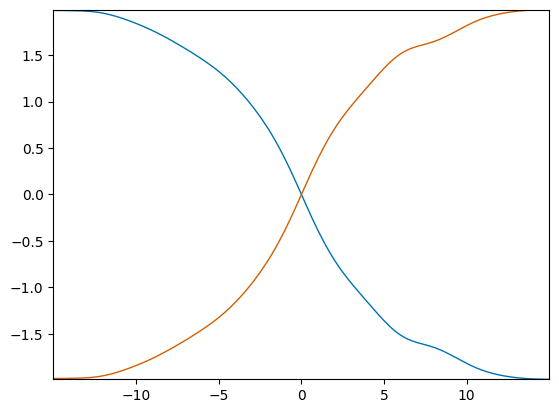

In [20]:
P1_mean = (Psi_1_data[time_idx,:,:]+Psi_2_data[time_idx,:,:])/2

plt.plot(y,np.mean(Psi_1_data[time_idx,:,:]-1*P1_mean,0))
plt.plot(y,np.mean(Psi_2_data[time_idx,:,:]-1*P1_mean,0))

# plt.plot(y,np.mean(psi1_data[time_idx,:,:],0)-np.mean(psi2_data[time_idx,:,:],0))

In [13]:
# bg_meanQ1 = (xi**(-2)+8)*y*0
# bg_meanQ2 = (xi**(-2)-8)*y*0

# zmeanQ1 = np.mean(q1_data[time_idx,:,:],axis=0)+bg_meanQ1
# zmeanQ2 = np.mean(q2_data[time_idx,:,:],axis=0)+bg_meanQ2

# plt.figure(figsize=(5, 3))
# plt.plot(y,zmeanQ1)
# # plt.plot(y,zmeanQ2)
# plt.plot(y,np.sin(y*0.5/xi+6)*12,'k')
# plt.xlabel('$x$'); plt.ylabel('$\overline{q_1}$')
# plt.title('Time=%.2f' %(sim_time_ary[time_idx]))

# figname = 'figs/2Lay_q1zonalmean_t%.2f' %sim_time_ary[time_idx]
# figname = figname.replace(".", "d" ); figname = figname+'.pdf'
# # plt.savefig(figname, bbox_inches='tight')

In [14]:
# # Numerics Parameters
# # L = x[-1]+(x[-1]-x[-2])
# Lx, Ly = L, L
# Nx, Ny = psi1_data.shape[2], psi1_data.shape[2]

# dealias = 3/2
# dtype = np.float64

# # Bases
# coords = d3.CartesianCoordinates('x', 'y')
# dist = d3.Distributor(coords, dtype=dtype)
# xbasis = d3.RealFourier(coords['x'], size=Nx, bounds=(0, Lx), dealias=dealias)
# ybasis = d3.RealFourier(coords['y'], size=Ny, bounds=(0, Ly), dealias=dealias)

# # Fields
# q1 = dist.Field(name='q1', bases=(xbasis,ybasis))

# time_idx = 0
# q1['g'] = q1_data[time_idx,:,:]

# q1_mag2d = q1['c']*np.conj(q1['c'])
# q1_spec = isospectrum(q1_mag2d)

# ######
# KK = xbasis.wavenumbers[2:-1:2]

# # plt.figure(figsize=(5, 3))
# # plt.pcolormesh(q1_mag2d)
# # plt.show()

# plt.figure(1,figsize=(5, 3))

# plt.loglog(KK,q1_spec[1:],label="%.1f" %sim_time_ary[time_idx])

# plt.loglog(KK,KK**-1*3e3,'--',color='k')
# plt.axvline(KK[-1],color='k')
# plt.axvline(0.634*np.sqrt(8),linestyle='-.',color='k')
# # plt.axvline(0.5/xi,color='k')

# # plt.ylim([1e-6,1e2])
# plt.ylim([1e-10,1e3])
# plt.title('$q_1$ Enstrophy spectrum')
# plt.xlabel('$k$')

# plt.legend(['_nolegend_', 'Second line'])

# plt.show()

# figname = 'figs/2Lay_q1spec_t%.2f' %sim_time_ary[time_idx]
# figname = figname.replace(".", "d" ); figname = figname+'.pdf'
# # plt.savefig(figname, bbox_inches='tight')

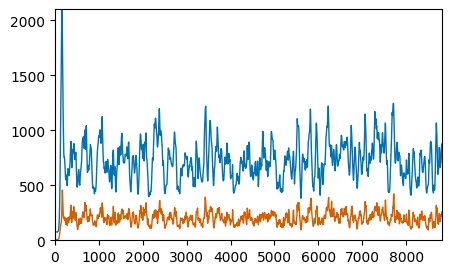

In [21]:
with h5py.File(diagname, mode='r') as file:
    
    KE1_data = np.squeeze(np.array(file['tasks']['KE1']))
    KE2_data = np.squeeze(np.array(file['tasks']['KE2']))
#     print(KE1_data.shape)
    diag_time_ary = np.array(file['scales']['sim_time'])

plt.figure(figsize=(5, 3))

lim = min(diag_time_ary.shape[0],KE1_data.shape[0])
# plt.semilogy(diag_time_ary[:lim],KE1_data[:lim])
# plt.semilogy(diag_time_ary[:lim],KE2_data[:lim])
plt.plot(diag_time_ary[:lim],KE1_data[:lim])
plt.plot(diag_time_ary[:lim],KE2_data[:lim])

plt.show()

figname = 'figs/2Lay_KEhist_t%.2f' %sim_time_ary[time_idx]
figname = figname.replace(".", "d" ); figname = figname+'.pdf'
# plt.savefig(figname, bbox_inches='tight')